# TRANSFORMS
Data does not always come in its final processed form that is required for training machine learning algorithms. We use __transforms__ to perform some manipulation of the data and make it suitable for training.

TorchVision datasets include two parameters: `transform` for adjusting the features, and `target_transform` for modifying the labels. Both of these parameters accept callable functions containing the transformation logic. The torchvision.transforms module provides a variety of commonly used transformations right out of the box.

The freatures in FashionMNIST are formatted as PIL images, whil the labels are represented as integers. For effective training, we need to convert the features into normalized tensors and the labels into one-hot encoded tensors. To accomplish these transformations, we employ the ToTensor and Lambda functions.

In [2]:
import torch
from torchvision import datasets
# Lambda is a transform that allows you to apply a user-defined fct to each sample in a dataset
from torchvision.transforms import ToTensor, Lambda

#Dataset
ds = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    # the `transform` parameter applies a set of transformations to each sample in the dataset.
    # In this case, `ToTensor()` converts the input image data to a tensor, which is a data structure that can be easily processed by PyTorch
    transform = ToTensor(),
    # The `target_transform` parameter applies a transformation to the label associated with each sample in the dataset.
    # In this case, `Lambda(...)` creates a one-hot encoded tensor from the label. Specifically, it creates a tensor of 10 zeros, and then sets the value at the index corresponding to the label to 1 using the `scatter_` method
    target_transform = Lambda(lambda y: torch.zeros(10, dtype = torch.float).scatter_(0, torch.tensor(y), value = 1))    
)


## ToTensor()
ToTensor() convert a PIL image or NumPy ndarray into a FloatTensor. and scales the image's pixel intensity values in the range[0.,1.]

## Lambda Transforms
Lambda transforms apply any user-defined lambda function. Here, we define a function to turn the integer into a one-hot encoded tensor. it first creates a zero tensor of size 10( the number of labels in our dataset) and calls scatter_ which assigns a `value = 1` on the index as given by the label `y`.

In [4]:
target_transform = Lambda(lambda y: torch.zeros(10, dtype = torch.float).scatter_(dim = 0, index = torch.tensor(y), value = 1))

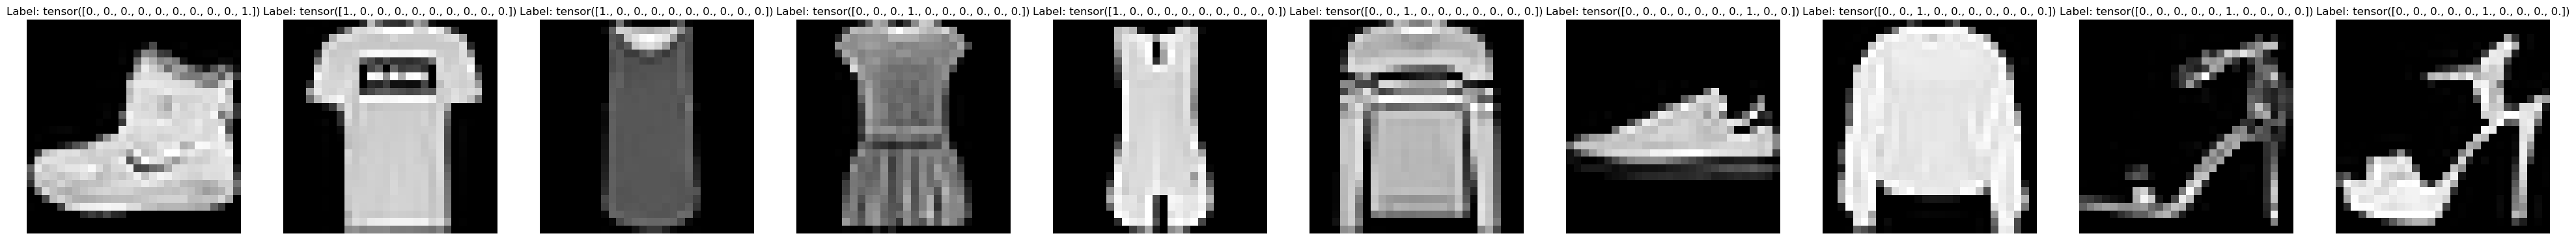

In [8]:
# We demonstrate how to use the ToTensor and Lambda transforms to preprocess the FashioMNIST dataset.
# It loads the dataset, applies the transforms, and then displays the first 10 images along with their one-hot encoded labels.

import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
import matplotlib.pyplot as plt

# Define the transforms
transform = transforms.Compose([transforms.ToTensor()])
target_transform = transforms.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))

# Load the dataset with the specified transforms
dataset = FashionMNIST(root="data", 
                       train=True, download=True, 
                       transform=transform, 
                       target_transform=target_transform)

# Function to display the images and labels
def display_images(images, labels, num_images=8):
    fig, axes = plt.subplots(1, num_images, figsize=(50, 30))
    for i, (img, label) in enumerate(zip(images, labels)):
        img = img.squeeze().numpy()  # Remove the channel dimension and convert the tensor to NumPy array
        axes[i].imshow(img, cmap="gray")
        axes[i].set_title(f"Label: {label}")
        axes[i].axis("off")
    plt.show()

# Display the first ten images and their one-hot encoded labels
images = [dataset[i][0] for i in range(10)]
labels = [dataset[i][1] for i in range(10)]

display_images(images, labels)
